In [2]:
from konlpy.tag import Mecab
from tqdm import tqdm
import re
import pickle
import csv
import pandas as pd
from pandas import DataFrame 
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import time

C:\Users\mjsk1\anaconda3\envs\Pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
with open('k_stopwords.txt', 'r',encoding='utf-8') as file:
    lines = file.readlines()
stop = [line.strip() for line in lines]

In [4]:
df1 = pd.read_excel("C:/Users/mjsk1/Desktop/미팅 발표/3 data/ai1.xlsx")
df2 = pd.read_excel("C:/Users/mjsk1/Desktop/미팅 발표/3 data/ai2.xlsx")
df3 = pd.read_excel("C:/Users/mjsk1/Desktop/미팅 발표/3 data/ai3.xlsx")
df4 = pd.read_excel("C:/Users/mjsk1/Desktop/미팅 발표/3 data/ai4.xlsx")
df5 = pd.read_excel("C:/Users/mjsk1/Desktop/미팅 발표/3 data/ai5.xlsx")
df6 = pd.read_excel("C:/Users/mjsk1/Desktop/미팅 발표/3 data/ai6.xlsx")
df7 = pd.read_excel("C:/Users/mjsk1/Desktop/미팅 발표/3 data/ai7.xlsx")
df8 = pd.read_excel("C:/Users/mjsk1/Desktop/미팅 발표/3 data/ai8.xlsx")

data_ai=pd.concat([df8,df7,df1, df2,df3,df4,df5,df6], ignore_index=True)

In [32]:
len(data_ai)

4078

In [5]:
excel_file_path = 'C:/Users/mjsk1/Desktop/미팅 발표/3 data/data_ai.xlsx'  # 저장할 Excel 파일 경로
data_ai.to_excel(excel_file_path, index=False) 

In [6]:
data_ai=data_ai.drop(109)
data_ai=data_ai.drop(1627)
data_ai=data_ai.reset_index(drop=True)

In [7]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ",}
def clean(text, punct, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text.strip()


import re

In [8]:
def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s\n]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','', string=text)
    text = re.sub('\n', '.', string=text)
    return text 

In [9]:
title=[]
text=[]
for i in range(len(data_ai)):
    title.append(clean_str(data_ai.loc[i]['Title']))
    text.append(clean_str(data_ai.loc[i]['text']))

In [10]:
corpus = [f'{elem1} {elem2}' for elem1, elem2 in zip(title, text)]
df = pd.DataFrame(corpus)
corpus=df.rename(columns={0:'text'})

In [11]:
corpus

,text
0,엘지 휘센 인공지능스스로에어컨FQ19P7DPAN 누수현상 해결 및 분해방법 스텐드 ...
1,종목분석 의료 인공지능 딥노이드 주가 전망을 살펴봅니다 안녕하세요 해피가이입니다.올...
2,반도체 종목 SK하이닉스 주가변동 인공지능 AI 5세대 HBM메모리 개발 2차전지 ...
3,미국주식 엔비디아 주가 500달러 돌파 인공지능 챗GPT 관련주 챗GPT 로 대변...
4,로봇 강아지 인공지능 AI의 루나 로봇 강아지첫만남 후기 로봇 강아지 인공지능 AI...
...,...
4073,개인 비서 마법 조수 시간 여행자까지 무엇이든 알려주는 초간단 인공지능 AI 안녕하...
4074,인공지능 대체가능 일자리 인공지능이 대체 가능한 일자리는 2022년 기준 327만 ...
4075,비트버니 퀴즈 3월 4일 인공지능을 활용 3월 3일 오늘의 퀴즈정답 안녕하세요.오...
4076,기계는 어떻게 생각하고 학습하는가 인공지능에 대한 여러 가지 고찰 기계는 인간처럼 ...


In [12]:
excel_file_path = 'C:/Users/mjsk1/Desktop/미팅 발표/3 data/data_ai.xlsx'  # 저장할 Excel 파일 경로
corpus.to_excel(excel_file_path, index=False) 

In [13]:
import konlpy
import re

def tokenize_korean_text(text):
    text = re.sub(r'[^,.?!\w\s]','', text)
    
    okt = konlpy.tag.Okt()
    Okt_morphs = okt.pos(text)
    
    words = []
    for word, pos in Okt_morphs:
        if pos == 'Noun':
            words.append(word)
    ## word를 이어붙인 string 형태가 아닌 word의 list를 return해주는 게 sklearn lda 준비 과정과의 차이
            
    return words


tokenized_list = []

for text in corpus['text']:
    tokenized_list.append(tokenize_korean_text(text))

print(len(tokenized_list))
print(tokenized_list[1])


4078
['종목', '분석', '의료', '인공', '지능', '딥노', '이드', '주가', '전망', '해피', '이입', '니', '올해', '초', '정부', '직접', '국민', '건강', '위', '미래', '첨단', '산업', '견인', '의료기기', '수출', '강국', '도약', '목표', '여러', '과제', '중', '의료', '분야', '대한', '지원이', '관련', '종목', '눈', '볼', '필요', '그', '중', '오늘', '인공', '지능', '딥노', '이드', '주가', '해당', '종목', '상승', '상태', '수', '의료', '관련', '주', '이슈', '때문', '특정', '기간', '집중', '상승', '하락', '반복', '관심', '목록', '주식', '정세', '타이밍', '인공', '지능', '의', '약자', '인간', '지적', '능력', '컴퓨터', '통해', '구현', '과학기술', '차', '산업혁명', '국내', '뿐', '세계', '여러', '강대국', '인공', '지능', '의', '주도', '잡기', '위해', '노력', '인공', '지능', '딥노', '이드', '물', '노', '기술', '주', '중심', '딥노', '이드', '상장', '설립', '이후', '상장', '시간', '상장', '일', '상장', '힘', '이기', '때문', '기업', '가치', '미래', '성장', '상승', '거', '볼', '수', '증명', '듯', '상장', '이후', '바로', '하락', '월', '초', '발표', '정부', '의료기기', '분야', '대한', '지원이', '상승', '시작', '차트', '구간', '매집', '발생', '이', '구간', '개미', '지선', '저항', '선', '파란색', '구간', '횡보', '거래량', '에너지', '걸', '알', '수', '현재', '원대', '밑', '조정', '가능성', '세력', '주가', '하방', '거', '생각', '

In [14]:
tokenized_list2 = [[item for item in sublist if item not in ["잘","우리","했다","해서","있다","한다","생","됩니다","번","때","이러한"]] for sublist in tokenized_list]
tokenized_list2 = [[item for item in sublist if item not in stop] for sublist in tokenized_list2]

tokenized_list2 = [sublist for sublist in tokenized_list2  if '자비스' not in sublist]
tokenized_list2 = [[word for word in sublist if len(word) > 1] for sublist in tokenized_list2]

In [55]:
from collections import Counter
def get_word_frequency_from_nested_list(nested_list):
    # 이중 리스트를 하나의 리스트로 펼치기
    words = [word for sublist in nested_list for word in sublist]
    
    # 펼친 리스트에서 단어 빈도수 계산
    word_freq = Counter(words)
    return word_freq
word_freq = get_word_frequency_from_nested_list(tokenized_list2)

In [57]:
len(word_freq)

27553

In [63]:
top_word_freq = word_freq.most_common(1000)
top_word_freq 

[('지능', 33865),
 ('인공', 32690),
 ('기술', 12195),
 ('데이터', 8271),
 ('활용', 7863),
 ('사용', 6569),
 ('기업', 5833),
 ('학습', 5722),
 ('개발', 5538),
 ('교육', 5386),
 ('관련', 5318),
 ('통해', 5278),
 ('대한', 5245),
 ('분야', 5016),
 ('서비스', 4831),
 ('모델', 4697),
 ('인간', 4544),
 ('제공', 4278),
 ('분석', 4131),
 ('정보', 3816),
 ('로봇', 3774),
 ('사람', 3760),
 ('생각', 3593),
 ('기반', 3437),
 ('위해', 3376),
 ('투자', 3285),
 ('기능', 3274),
 ('발전', 3253),
 ('미래', 3182),
 ('때문', 3176),
 ('이미지', 3135),
 ('시장', 3095),
 ('산업', 3093),
 ('과정', 3062),
 ('시스템', 2968),
 ('문제', 2957),
 ('대해', 2921),
 ('러닝', 2867),
 ('반도체', 2837),
 ('가지', 2776),
 ('지원', 2739),
 ('성형', 2618),
 ('방법', 2537),
 ('구글', 2517),
 ('내용', 2475),
 ('주가', 2377),
 ('현재', 2369),
 ('사업', 2362),
 ('시대', 2308),
 ('디지털', 2290),
 ('이용', 2237),
 ('진행', 2232),
 ('언어', 2202),
 ('가장', 2197),
 ('혁신', 2184),
 ('작업', 2158),
 ('이해', 2157),
 ('능력', 2150),
 ('경우', 2117),
 ('시작', 2088),
 ('처리', 2073),
 ('영상', 2063),
 ('미국', 2054),
 ('플랫폼', 2048),
 ('프로그램', 1987),
 ('적용', 1972)

In [321]:
import json
with open('tokenlist2_data.json', 'w') as f:
    json.dump(tokenized_list2, f)

In [16]:
# bigram 생성에 필요한 library
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# vectorize & lda에 필요한 library
from gensim import corpora
from gensim.models.ldamodel import LdaModel

In [17]:
# Build the bigram models
bigram = Phrases(tokenized_list2, min_count=4, threshold=10)
bigram_mod = Phraser(bigram)
 
# See example
print(bigram_mod[tokenized_list2[0]])

['엘지_휘센', '인공_지능', '스스로_에어컨', '누수_현상', '해결', '분해', '방법', '스텐드', '에어컨', '엘지_휘센', '인공_지능', '스스로_에어컨', '사용', '실외', '보드', '고장', '교체', '비용', '포함', '포스팅', '소개', '누수_현상', '물이', '상황', '점검', '에어컨', '물이', '아차', '입추', '올해', '한참', '수기', '스탠드_에어컨', '누수_현상', '물이', '이유', '신청', '서비스', '비용_최소', '이상은', '필터', '청소', '원인', '청소', '사용', '누수_현상', '시도', '휘센', '인공_지능', '스스로_에어컨', '분해', '방법', '전문_지식', '엘지_휘센', '인공_지능', '스스로_에어컨', '분해', '수도', '나중', '수리', '비용_지불', '더위', '해결_위해', '시도', '사실', '처음', '상전', '서비스', '센터', '생각', '수기', '고생', '내내', '분해', '엘지', '인공_지능', '스스로_에어컨', '분해', '방법', '보지', '당황', '막상', '가지', '부분', '정리', '먼저', '엘지_휘센', '인공', '기능', '스스로_에어컨', '전원', '플러그', '실외', '공급', '실외', '전원', '플러글', '작업', '시작', '먼저', '스탠드_에어컨', '모델', '엘지', '인공_지능', '스스로_에어컨', '전면', '상단_하단', '하단', '다시', '상단_하단', '개인', '전면', '하단', '판넬', '분해', '하단', '부의', '부분', '물이', '호스', '부분', '스탠드_에어컨', '누수', '원인', '냉매', '호스', '원인', '때문', '참고', '중앙', '부분', '길죽', '사각형', '패널', '살짝', '연결', '확인', '플러스', '연결', '플라스틱', '수도', '나사', '바깥쪽', '안쪽', '빼기', '사진',

In [18]:
words_bigram = [bigram_mod[doc] for doc in tokenized_list2]

In [19]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [20]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# vectorize & lda에 필요한 library
from gensim import corpora
from gensim.models.ldamodel import LdaModel

In [24]:
dictionary = corpora.Dictionary(words_bigram)  # 각 단어에 번호를 할당해줌
    # bigram 포함하는 과정을 생략하고 싶으면, 그냥 바로 여기에 tokenized_list를 넣어주면 됨

dictionary.filter_extremes(no_below=2, no_above=0.3)   
    # 2개의 문서 미만으로 등장하는 단어는 제외, 전체의 5% 이상으로 자주 등장하는 단어는 제외

corpus = [dictionary.doc2bow(text) for text in words_bigram]
print(corpus[0]) # 첫번째 corpus를 테스트로 출력: 몇 번째 단어가 몇 번 나왔는지 저장되어 있음

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 2), (8, 2), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 4), (18, 3), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 3), (26, 1), (27, 1), (28, 6), (29, 4), (30, 1), (31, 1), (32, 5), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 6), (40, 1), (41, 1), (42, 8), (43, 3), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 2), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 3), (66, 1), (67, 1), (68, 1), (69, 1), (70, 12), (71, 2), (72, 2), (73, 1), (74, 6), (75, 3), (76, 1), (77, 2), (78, 5), (79, 3), (80, 6), (81, 1), (82, 5), (83, 3), (84, 1), (85, 2), (86, 1), (87, 6), (88, 1), (89, 1), (90, 2), (91, 1), (92, 1), (93, 1), (94, 2), (95, 1), (96, 1), (97, 2), (98, 1), (99, 2), (100, 3), (101, 1), (102, 1), (103, 1), (104, 7), (105, 1), (106, 3), (107, 1), (108, 1), (109, 1), (110, 1)

In [25]:
import gensim
a=0.2
b=0.2
num_topics = 6
passes = 10
iterations = 400
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = num_topics, id2word=dictionary,
                                            iterations=iterations,passes=passes,
                                           alpha=a,eta=b,random_state=10)


In [26]:
ldamodel.print_topics(num_words=7)  # num_words=10이 default

[(0,
  '0.033*"교육" + 0.012*"과정" + 0.010*"학생" + 0.008*"수업" + 0.007*"진행" + 0.007*"코딩" + 0.006*"강의"'),
 (1,
  '0.015*"기능" + 0.013*"이미지" + 0.008*"사진" + 0.007*"이용" + 0.006*"선택" + 0.006*"검색" + 0.006*"영상"'),
 (2,
  '0.017*"인간" + 0.007*"모델" + 0.007*"발전" + 0.005*"문제" + 0.005*"능력" + 0.005*"시대" + 0.005*"시스템"'),
 (3,
  '0.010*"모델" + 0.010*"산업" + 0.009*"시스템" + 0.006*"분석" + 0.005*"반도체" + 0.005*"지원" + 0.005*"솔루션"'),
 (4,
  '0.014*"투자" + 0.012*"로봇" + 0.010*"반도체" + 0.009*"시장" + 0.008*"엔비디아" + 0.008*"상승" + 0.007*"주가"'),
 (5,
  '0.011*"성형" + 0.007*"구글" + 0.007*"플랫폼" + 0.006*"고객" + 0.005*"애플" + 0.005*"분석" + 0.005*"혁신"')]

In [27]:
import gensim
def lda(num_topics,passes,a,b): 
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = num_topics, id2word=dictionary,
                                            iterations=400,passes=passes,
                                           alpha=a,eta=b,random_state=10)
    PerWordPP = ldamodel.log_perplexity(corpus)
    return PerWordPP

In [29]:
coherences=[]
perplexities=[]
passes=[]

for i in range(1,40,2):

    tic = time.time()
    
    lda = gensim.models.ldamodel.LdaModel(corpus, num_topics = 6, id2word=dictionary,
                                            iterations=400,passes=i,
                                           alpha=0.3,eta=0.3,random_state=10)
    print(i,"time:",time.time() - tic)

    cm = CoherenceModel(model=lda, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherences.append(coherence)
    print('Perplexity: ', lda.log_perplexity(corpus),'\n\n')
    perplexities.append(lda.log_perplexity(corpus))

1 time: 13.35762357711792
Cpherence -1.3551836491887659
Perplexity:  -8.436042160057454 


3 time: 23.985318899154663
Cpherence -1.341950513695631
Perplexity:  -8.268245906816993 


5 time: 33.100088357925415
Cpherence -1.3408979286368494
Perplexity:  -8.210920701362358 


7 time: 41.50197434425354
Cpherence -1.3572229212478586
Perplexity:  -8.187963818377835 


9 time: 46.76108694076538
Cpherence -1.3561748367645645
Perplexity:  -8.177001288913809 


11 time: 53.511268854141235
Cpherence -1.344696292259371
Perplexity:  -8.170494551553316 


13 time: 60.11320114135742
Cpherence -1.3374155999216135
Perplexity:  -8.166075934527434 


15 time: 68.57286930084229
Cpherence -1.3340180434512188
Perplexity:  -8.16259946468981 


17 time: 80.22037649154663
Cpherence -1.340475950973466
Perplexity:  -8.159924422951907 


19 time: 92.19010543823242
Cpherence -1.3465972899110101
Perplexity:  -8.157798357430403 


21 time: 100.50918340682983
Cpherence -1.3452672219172621
Perplexity:  -8.155941070205

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

(-1.4, -1.3)

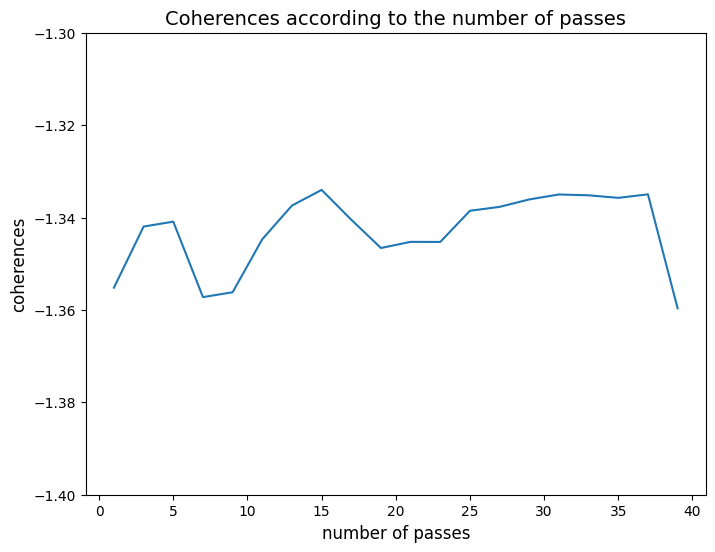

In [44]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
x=[i for i in range(1,40,2)]
ax1.plot(x,coherences)
ax1.set_title('Coherences according to the number of passes', size=14)
ax1.set_ylabel('coherences',fontsize=12)
ax1.set_xlabel('number of passes',fontsize=12)
plt.ylim(-1.4,-1.3)

Text(0.5, 0, 'number of passes')

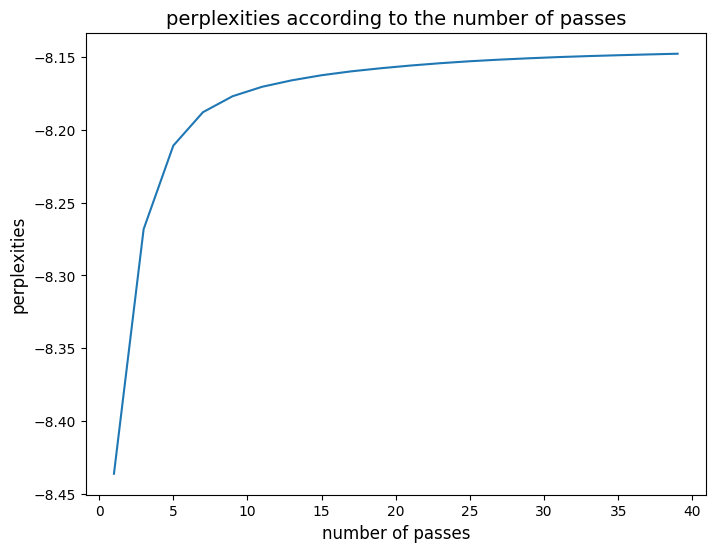

In [45]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
x=[i for i in range(1,40,2)]
ax1.plot(x,perplexities)
ax1.set_title('perplexities according to the number of passes', size=14)
ax1.set_ylabel('perplexities',fontsize=12)
ax1.set_xlabel('number of passes',fontsize=12)


In [31]:
coherences3=[]
perplexities3=[]

for i in range(1,15):
    tic = time.time()
    
    lda = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=dictionary,
                                            iterations=400,passes=15,
                                           alpha=0.3,eta=0.3,random_state=10)
    print(i,"time:",time.time() - tic)

    cm = CoherenceModel(model=lda, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherences3.append(coherence)
    print('Perplexity: ', lda.log_perplexity(corpus),'\n\n')
    perplexities3.append(lda.log_perplexity(corpus))

1 time: 17.166639804840088
Cpherence -1.2680685161169243
Perplexity:  -8.454532077712509 


2 time: 55.727110385894775
Cpherence -1.2761862813271727
Perplexity:  -8.332778418979888 


3 time: 58.362281799316406
Cpherence -1.3489454351602432
Perplexity:  -8.258656533269571 


4 time: 63.28101181983948
Cpherence -1.3192160483422852
Perplexity:  -8.197152576595046 


5 time: 71.82766652107239
Cpherence -1.3353679000551348
Perplexity:  -8.176434498816615 


6 time: 74.85875582695007
Cpherence -1.3340180434512188
Perplexity:  -8.16259946468981 


7 time: 71.72292232513428
Cpherence -1.5816393608438888
Perplexity:  -8.167220106602686 


8 time: 69.96633982658386
Cpherence -1.468769253656101
Perplexity:  -8.167203855045805 


9 time: 70.88584017753601
Cpherence -1.6058825423260574
Perplexity:  -8.1637692280654 


10 time: 71.15479588508606
Cpherence -1.6497484097397082
Perplexity:  -8.146796686388655 


11 time: 68.62749028205872
Cpherence -2.4716521374512257
Perplexity:  -8.146736370466618 


Text(0.5, 0, 'number of topics')

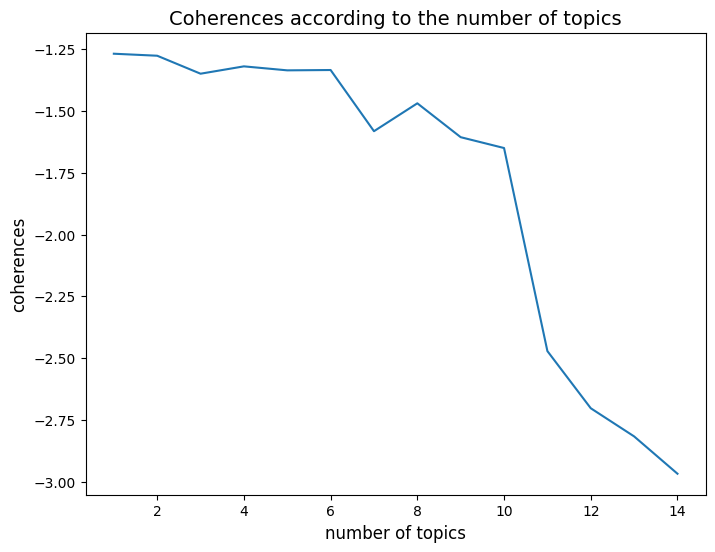

In [48]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
x=[i for i in range(1,15)]
ax1.plot(x,coherences3)
ax1.set_title('Coherences according to the number of topics', size=14)
ax1.set_ylabel('coherences',fontsize=12)
ax1.set_xlabel('number of topics',fontsize=12)


Text(0.5, 0, 'number of topics')

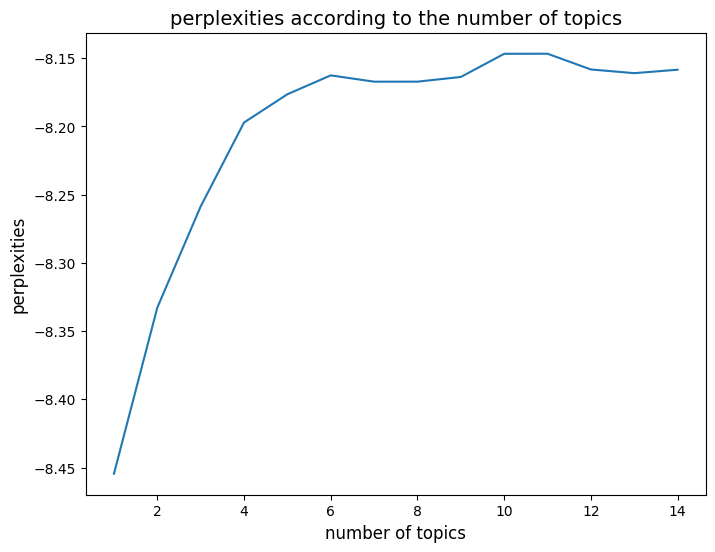

In [49]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
x=[i for i in range(1,15)]
ax1.plot(x,perplexities3)
ax1.set_title('perplexities according to the number of topics', size=14)
ax1.set_ylabel('perplexities',fontsize=12)
ax1.set_xlabel('number of topics',fontsize=12)

In [65]:
import gensim
a=0.3
b=0.3
num_topics = 4
passes = 15
iterations = 400
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = num_topics, id2word=dictionary,
                                            iterations=iterations,passes=passes,
                                           alpha=a,eta=b,random_state=10)

In [66]:
ldamodel.print_topics(num_words=10)

[(0,
  '0.027*"교육" + 0.010*"과정" + 0.008*"학생" + 0.006*"진행" + 0.006*"수업" + 0.006*"코딩" + 0.005*"지원" + 0.005*"강의" + 0.005*"로봇" + 0.005*"취업"'),
 (1,
  '0.013*"기능" + 0.010*"이미지" + 0.006*"사진" + 0.006*"검색" + 0.006*"이용" + 0.006*"구글" + 0.005*"네이버" + 0.005*"선택" + 0.005*"성형" + 0.005*"영상"'),
 (2,
  '0.013*"인간" + 0.009*"모델" + 0.006*"발전" + 0.005*"시스템" + 0.004*"분석" + 0.004*"문제" + 0.004*"시대" + 0.004*"능력" + 0.004*"성형" + 0.004*"예측"'),
 (3,
  '0.011*"투자" + 0.010*"반도체" + 0.008*"시장" + 0.007*"산업" + 0.006*"엔비디아" + 0.006*"로봇" + 0.005*"사업" + 0.005*"상승" + 0.005*"주가" + 0.005*"미국"')]

In [67]:
import gensim
a=0.3
b=0.3
num_topics = 5
passes = 15
iterations = 400
ldamodel2 = gensim.models.ldamodel.LdaModel(corpus, num_topics = num_topics, id2word=dictionary,
                                            iterations=iterations,passes=passes,
                                           alpha=a,eta=b,random_state=10)

In [68]:
ldamodel2.print_topics(num_words=10)

[(0,
  '0.030*"교육" + 0.010*"과정" + 0.009*"학생" + 0.007*"수업" + 0.007*"진행" + 0.006*"코딩" + 0.006*"강의" + 0.005*"취업" + 0.005*"공부" + 0.005*"지원"'),
 (1,
  '0.014*"기능" + 0.011*"이미지" + 0.007*"사진" + 0.006*"이용" + 0.006*"검색" + 0.006*"선택" + 0.005*"영상" + 0.005*"방법" + 0.005*"성형" + 0.005*"그림"'),
 (2,
  '0.015*"인간" + 0.009*"모델" + 0.006*"발전" + 0.005*"시스템" + 0.005*"문제" + 0.005*"능력" + 0.005*"성형" + 0.005*"시대" + 0.004*"분석" + 0.004*"이해"'),
 (3,
  '0.010*"산업" + 0.007*"시스템" + 0.007*"반도체" + 0.007*"사업" + 0.006*"혁신" + 0.006*"솔루션" + 0.005*"지원" + 0.005*"글로벌" + 0.005*"분석" + 0.005*"제품"'),
 (4,
  '0.012*"투자" + 0.010*"로봇" + 0.008*"엔비디아" + 0.008*"시장" + 0.008*"반도체" + 0.007*"상승" + 0.007*"주가" + 0.006*"종목" + 0.006*"미국" + 0.006*"주식"')]

In [69]:
import gensim
a=0.3
b=0.3
num_topics = 6
passes = 15
iterations = 400
ldamodel3 = gensim.models.ldamodel.LdaModel(corpus, num_topics = num_topics, id2word=dictionary,
                                            iterations=iterations,passes=passes,
                                           alpha=a,eta=b,random_state=10)

In [70]:
ldamodel3.print_topics(num_words=10)

[(0,
  '0.032*"교육" + 0.011*"과정" + 0.009*"학생" + 0.007*"수업" + 0.007*"진행" + 0.007*"코딩" + 0.006*"강의" + 0.006*"취업" + 0.006*"공부" + 0.005*"지원"'),
 (1,
  '0.014*"기능" + 0.012*"이미지" + 0.007*"사진" + 0.007*"이용" + 0.006*"선택" + 0.006*"검색" + 0.005*"영상" + 0.005*"방법" + 0.005*"그림" + 0.004*"프로그램"'),
 (2,
  '0.017*"인간" + 0.008*"모델" + 0.007*"발전" + 0.005*"문제" + 0.005*"능력" + 0.005*"시대" + 0.005*"이해" + 0.004*"시스템" + 0.004*"지능" + 0.004*"변화"'),
 (3,
  '0.010*"시스템" + 0.010*"모델" + 0.009*"산업" + 0.006*"분석" + 0.005*"지원" + 0.005*"솔루션" + 0.005*"혁신" + 0.005*"반도체" + 0.005*"연구" + 0.005*"의료"'),
 (4,
  '0.015*"투자" + 0.011*"반도체" + 0.011*"로봇" + 0.010*"시장" + 0.009*"엔비디아" + 0.008*"상승" + 0.008*"주가" + 0.007*"종목" + 0.007*"주식" + 0.006*"미국"'),
 (5,
  '0.012*"성형" + 0.007*"구글" + 0.006*"플랫폼" + 0.006*"고객" + 0.005*"혁신" + 0.005*"애플" + 0.005*"네이버" + 0.005*"사업" + 0.005*"분석" + 0.004*"산업"')]